In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

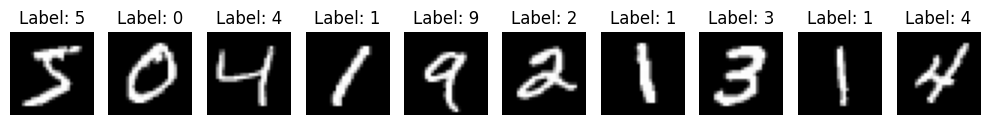

In [4]:
import matplotlib.pyplot as plt

# plt.imshow(X_train[0], cmap='gray')
def print_images(X, y, n: int):
  """Print n images in a row"""
  plt.figure(figsize=(10, 5))
  for i in range(n):
      plt.subplot(1, n, i+1)
      plt.imshow(X[i], cmap='gray')
      plt.title(f"Label: {y[i]}")
      plt.axis('off')
  plt.tight_layout()
  plt.show()

print_images(X_train, y_train, 10)

In [5]:
# # Our data only have two possibilities 1.The pixel is turned ON, 2.The pixel is turned OFF
# # We don't need the actual value of that pixel. Lets make that happen

# import pandas as pd


# for i in range(60000):
#   X_train[i] = np.where(X_train[i] > 0, 1, 0)

# For neural network to produce better result we try to make out data in similar range
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

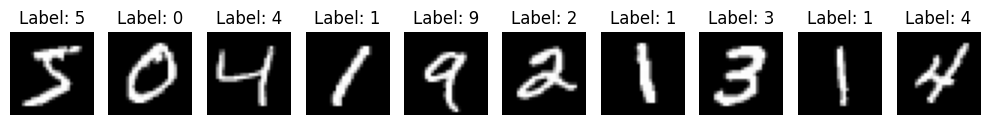

In [7]:
print_images(X_train, y_train, 10)

In [8]:
# Right now our data is in 2D array we first need to flatten that array

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 244522 (955.16 KB)
Trainable params: 24452

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2599 - accuracy: 0.9215 - val_loss: 0.1293 - val_accuracy: 0.9600
Epoch 2/15
1500/1500 [==============================] - 16s 10ms/step - loss: 0.1037 - accuracy: 0.9682 - val_loss: 0.1122 - val_accuracy: 0.9675
Epoch 3/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0728 - accuracy: 0.9782 - val_loss: 0.1134 - val_accuracy: 0.9663
Epoch 4/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0541 - accuracy: 0.9836 - val_loss: 0.1126 - val_accuracy: 0.9708
Epoch 5/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0502 - accuracy: 0.9840 - val_loss: 0.0942 - val_accuracy: 0.9752
Epoch 6/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.0994 - val_accuracy: 0.9740
Epoch 7/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.1195 - val_accur

In [12]:
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [13]:
y_pred

array([[2.54976908e-11, 2.00438457e-08, 6.51594542e-11, ...,
        9.99990404e-01, 2.55984389e-09, 6.80147696e-06],
       [1.52824042e-13, 1.57010867e-08, 9.99999940e-01, ...,
        2.34711006e-09, 5.73001594e-14, 6.24316925e-18],
       [2.61203602e-12, 9.99999702e-01, 6.17705276e-10, ...,
        6.54431460e-08, 1.15696096e-07, 5.54159607e-10],
       ...,
       [1.55526499e-16, 1.68188231e-13, 5.75112603e-14, ...,
        1.13224976e-11, 1.06361355e-15, 1.93120675e-09],
       [3.53189975e-17, 5.75937491e-20, 1.59621756e-21, ...,
        1.08041137e-17, 1.73924646e-14, 2.93225375e-11],
       [1.89795121e-20, 2.02262088e-17, 1.29848389e-20, ...,
        4.10069052e-23, 2.58248555e-13, 5.90490226e-16]], dtype=float32)

In [14]:
y_pred = y_pred.argmax(axis=1)

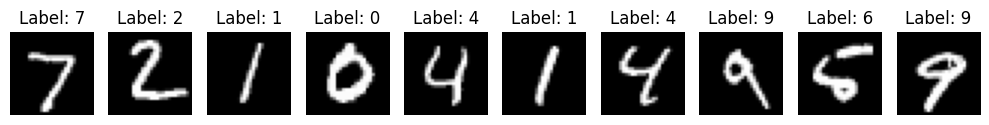

In [15]:
print_images(X_test, y_pred, 10)

In [16]:
from sklearn.metrics import accuracy_score

ac_score = accuracy_score(y_test, y_pred)
print(ac_score)

0.9786


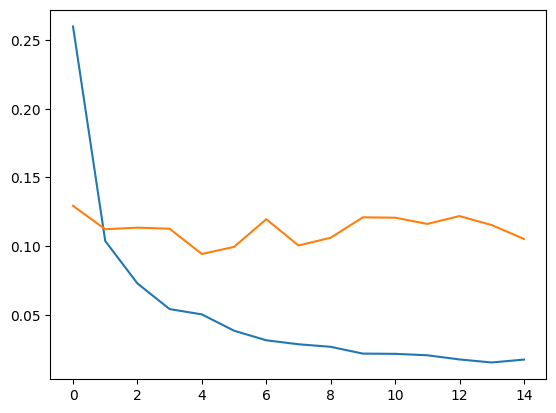

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

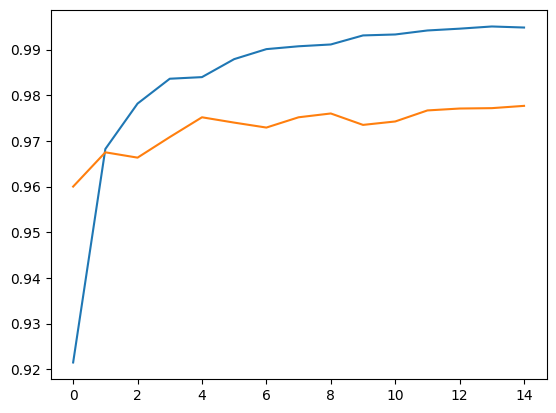

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [19]:
#  Prediction

model.predict(X_test[15].reshape(1, 28, 28)).argmax(axis=1)[0]

1/1 [==============================] - 0s 59ms/step


5

In [21]:
y_test[15]

5